# UDEMY_DEEP_LEARNING_A-Z_ANN_KIRILL_2.ipynb

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#OneHotEncoder-(using-get_dummies)" data-toc-modified-id="OneHotEncoder-(using-get_dummies)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>OneHotEncoder (using get_dummies)</a></span></li><li><span><a href="#Split" data-toc-modified-id="Split-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Split</a></span></li><li><span><a href="#StandardScaler-(do-this-after-splitting)" data-toc-modified-id="StandardScaler-(do-this-after-splitting)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>StandardScaler (do this after splitting)</a></span></li><li><span><a href="#ANN" data-toc-modified-id="ANN-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>ANN</a></span><ul class="toc-item"><li><span><a href="#BUILD" data-toc-modified-id="BUILD-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>BUILD</a></span><ul class="toc-item"><li><span><a href="#Add-first-hidden-layer" data-toc-modified-id="Add-first-hidden-layer-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Add first hidden layer</a></span></li><li><span><a href="#Add-second-hidden-layer" data-toc-modified-id="Add-second-hidden-layer-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Add second hidden layer</a></span></li><li><span><a href="#Add-output-layer" data-toc-modified-id="Add-output-layer-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Add output layer</a></span></li></ul></li><li><span><a href="#TRAIN/FIT" data-toc-modified-id="TRAIN/FIT-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>TRAIN/FIT</a></span></li><li><span><a href="#PREDICT" data-toc-modified-id="PREDICT-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>PREDICT</a></span><ul class="toc-item"><li><span><a href="#Convert-prediction-probability-values-to-boolean" data-toc-modified-id="Convert-prediction-probability-values-to-boolean-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Convert prediction probability values to boolean</a></span></li></ul></li><li><span><a href="#EVALUATE" data-toc-modified-id="EVALUATE-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>EVALUATE</a></span></li></ul></li><li><span><a href="#K-FOLD-CROSS-VALIDATION" data-toc-modified-id="K-FOLD-CROSS-VALIDATION-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>K-FOLD CROSS VALIDATION</a></span></li><li><span><a href="#Dropout-Regularization-(is-THE-solutiorn-for-overfitting-im-deep-learning)" data-toc-modified-id="Dropout-Regularization-(is-THE-solutiorn-for-overfitting-im-deep-learning)-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Dropout Regularization (is THE solutiorn for overfitting im deep learning)</a></span></li><li><span><a href="#PARAMETER-TUNING-(GRID-SEARCH)" data-toc-modified-id="PARAMETER-TUNING-(GRID-SEARCH)-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>PARAMETER TUNING (GRID SEARCH)</a></span></li></ul></div>

In [ ]:
import keras

### Deep Learning Libararies

In [ ]:
# LIBRARIES 
#     1) THEANO
#         -> open source numerical computations library
#         -> efficient fast numerical computations; 
#         -> numpy syntax
#         -> can run on CPUs & GPUs(more cores;higher floating point calculations per second)
#     2) TENSORFLOW
#     3) KERAS

### Installation

In [ ]:
#
'''
!pip install tensorflow
!pip install theano
!pip install keras

Collecting theano
  Downloading https://files.pythonhosted.org/packages/4d/b1/d490d88ab47f01f367f413bd2e47d86acf92c84157c5172c23903798bd70/Theano-1.0.3.tar.gz (2.8MB)
    100% |████████████████████████████████| 2.8MB 4.5MB/s eta 0:00:01    40% |████████████▉                   | 1.1MB 686kB/s eta 0:00:03    44% |██████████████▏                 | 1.2MB 3.2MB/s eta 0:00:01
Requirement already satisfied: numpy>=1.9.1 in /anaconda3/lib/python3.6/site-packages (from theano) (1.15.2)
Requirement already satisfied: scipy>=0.14 in /anaconda3/lib/python3.6/site-packages (from theano) (1.1.0)
Requirement already satisfied: six>=1.9.0 in /anaconda3/lib/python3.6/site-packages (from theano) (1.11.0)
Building wheels for collected packages: theano
  Running setup.py bdist_wheel for theano ... done
  Stored in directory: /Users/pinky/Library/Caches/pip/wheels/10/82/05/9ef5e43bfcf906b4810f85f91b09d6daf7ad213d30179defa9
Successfully built theano
tensorflow 1.10.0 has requirement numpy<=1.14.5,>=1.13.3, but you'll have numpy 1.15.2 which is incompatible.
Installing collected packages: theano
Successfully installed theano-1.0.3
'''

In [ ]:
# Update all conda libararies
#!conda update -y --all

In [ ]:
# !conda update -y matplotlib

In [ ]:
# Uninstall pip's version
#!pip uninstall -y matplotlib

# DOESN'T WORK: !conda install matplotlib
# WORKS: !conda install -c conda-forge matplotlib=3.0.0

### HouseKeeping

In [1]:
# %load '../../src/scripts/housekeeping.py'
#Housekeeping\
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

from IPython.display import Image
from IPython.core.display import HTML 
#Image(filename='images/extracting_data_from_db_template.png', height=300, width=400)}

In [2]:
raw_data_path = os.path.join(os.pardir, '..', 'data', 'raw') 
churnDF = pd.read_csv(os.path.join(raw_data_path, 'Churn_Modelling.csv'))

In [3]:
churnDF.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
churnDF.drop(axis='columns', columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [5]:
churnDF.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


###  OneHotEncoder (using get_dummies)

In [6]:
churnDF = pd.get_dummies(churnDF, columns=['Geography', 'Gender'], prefix=["Geography", "Gender"])

In [7]:
churnDF.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [8]:
#DOESN'T WORK (beacuse you CANNOT use OneHotEncoder to encode a string column)
# from sklearn.preprocessing import OneHotEncoder
# oneHotEncoder = OneHotEncoder(categorical_features=['Geography', 'Gender'])
# chrunDF2 = oneHotEncoder.fit_transform(churnDF)
# ValueError: could not convert string to float: 'France'

In [9]:
churnDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
CreditScore          10000 non-null int64
Age                  10000 non-null int64
Tenure               10000 non-null int64
Balance              10000 non-null float64
NumOfProducts        10000 non-null int64
HasCrCard            10000 non-null int64
IsActiveMember       10000 non-null int64
EstimatedSalary      10000 non-null float64
Exited               10000 non-null int64
Geography_France     10000 non-null uint8
Geography_Germany    10000 non-null uint8
Geography_Spain      10000 non-null uint8
Gender_Female        10000 non-null uint8
Gender_Male          10000 non-null uint8
dtypes: float64(2), int64(7), uint8(5)
memory usage: 752.0 KB


### Split

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = churnDF.drop('Exited', axis='columns')
y = churnDF.Exited

In [12]:
X.tail()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
9995,771,39,5,0.00,2,1,0,96270.64,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,0,1,0,0,1
9999,792,28,4,130142.79,1,1,0,38190.78,1,0,0,1,0


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0)

In [14]:
X_train.count()

CreditScore          8000
Age                  8000
Tenure               8000
Balance              8000
NumOfProducts        8000
HasCrCard            8000
IsActiveMember       8000
EstimatedSalary      8000
Geography_France     8000
Geography_Germany    8000
Geography_Spain      8000
Gender_Female        8000
Gender_Male          8000
dtype: int64

### StandardScaler (do this after splitting)

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
standardScaler = StandardScaler()
X_train = standardScaler.fit_transform(X_train)
X_test = standardScaler.fit_transform(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [17]:
type(X_train)

numpy.ndarray

### ANN

In [18]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


#### BUILD

In [19]:
classifier = Sequential()

##### Add first hidden layer

In [20]:
classifier.add(Dense(output_dim=7, init='uniform', activation='relu', input_dim=13))   # 13+1/2 = 7 layers

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=7, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


##### Add second hidden layer

In [21]:
classifier.add(Dense(output_dim=7, init='uniform', activation='relu')) 

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=7, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


##### Add output layer

In [22]:
classifier.add(Dense(output_dim=1, init='uniform', activation='sigmoid')) # use submax for mulitple label classes

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


In [23]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#### TRAIN/FIT

In [24]:
classifier.fit(X_train, y_train, batch_size=10, nb_epoch=100)

'''
Epoch 1/100
8000/8000 [==============================] - 6s 782us/step - loss: 0.4832 - acc: 0.7957
Epoch 2/100
8000/8000 [==============================] - 4s 444us/step - loss: 0.4291 - acc: 0.7960
Epoch 3/100
8000/8000 [==============================] - 4s 519us/step - loss: 0.4209 - acc: 0.8131
...
Epoch 97/100
8000/8000 [==============================] - 4s 457us/step - loss: 0.3418 - acc: 0.8610 2s - loss: 0.343 - ETA:
Epoch 98/100
8000/8000 [==============================] - 3s 415us/step - loss: 0.3415 - acc: 0.8617
Epoch 99/100
8000/8000 [==============================] - 3s 405us/step - loss: 0.3408 - acc: 0.8602
Epoch 100/100
8000/8000 [==============================] - 3s 425us/step - loss: 0.3418 - acc: 0.8614
'''

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/100
8000/8000 [==============================] - 5s 589us/step - loss: 0.4826 - acc: 0.7960
Epoch 2/100
8000/8000 [==============================] - 3s 328us/step - loss: 0.4282 - acc: 0.7960
Epoch 3/100
8000/8000 [==============================] - 3s 329us/step - loss: 0.4229 - acc: 0.8020
Epoch 4/100
8000/8000 [==============================] - 3s 323us/step - loss: 0.4186 - acc: 0.8237 1s - 
Epoch 5/100
8000/8000 [==============================] - 3s 366us/step - loss: 0.4166 - acc: 0.8271
Epoch 6/100
8000/8000 [==============================] - 3s 333us/step - loss: 0.4145 - acc: 0.8302
Epoch 7/100
8000/8000 [==============================] - 3s 338us/step - loss: 0.4130 - acc: 0.8299
Epoch 8/100
8000/8000 [==============================] - 3s 357us/step - loss: 0.4117 - acc: 0.8324
Epoch 9/100
8000/8000 [==============================] - 3s 341us/step - loss: 0.4108 - acc: 0.8345
Epoch 10/100
8000/8000 [==============================] - 3s 347us/step - loss: 0.4095 - acc: 

'\nEpoch 1/100\n8000/8000 [==============================] - 6s 782us/step - loss: 0.4832 - acc: 0.7957\nEpoch 2/100\n8000/8000 [==============================] - 4s 444us/step - loss: 0.4291 - acc: 0.7960\nEpoch 3/100\n8000/8000 [==============================] - 4s 519us/step - loss: 0.4209 - acc: 0.8131\n...\nEpoch 97/100\n8000/8000 [==============================] - 4s 457us/step - loss: 0.3418 - acc: 0.8610 2s - loss: 0.343 - ETA:\nEpoch 98/100\n8000/8000 [==============================] - 3s 415us/step - loss: 0.3415 - acc: 0.8617\nEpoch 99/100\n8000/8000 [==============================] - 3s 405us/step - loss: 0.3408 - acc: 0.8602\nEpoch 100/100\n8000/8000 [==============================] - 3s 425us/step - loss: 0.3418 - acc: 0.8614\n'

#### PREDICT

In [25]:
prediction = classifier.predict(X_test)

In [26]:
prediction

array([[0.1815121 ],
       [0.35437876],
       [0.16259202],
       ...,
       [0.1753319 ],
       [0.17068844],
       [0.11269962]], dtype=float32)

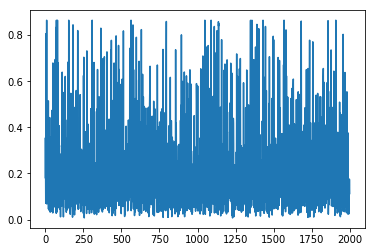

In [27]:
plt.plot(np.sort(prediction))

##### Convert prediction probability values to boolean

In [28]:
prediction = prediction > 0.5  # values greater than 0.5  is set to True, else, False

In [29]:
prediction[:5]

array([[False],
       [False],
       [False],
       [False],
       [False]])

In [30]:
y_test.head()

9394    0
898     1
2398    0
5906    0
2343    0
Name: Exited, dtype: int64

#### EVALUATE

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [35]:
cm = confusion_matrix(y_test, prediction)
cm

array([[1545,   50],
       [ 275,  130]])

In [36]:
ascore = accuracy_score(y_test, prediction)
ascore

0.8375

In [37]:
# convert y_test values to boolean
y_test2 = y_test > 0
y_test2[:5]

9394    False
898      True
2398    False
5906    False
2343    False
Name: Exited, dtype: bool

In [38]:
cm2 = confusion_matrix(y_test2, prediction)
cm2

array([[1545,   50],
       [ 275,  130]])

In [39]:
ascore2 = accuracy_score(y_test2, prediction)
ascore2

0.8375

In [48]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


In [50]:
X_train[0:1]

array([[ 0.16958176, -0.46460796,  0.00666099, -1.21571749,  0.8095029 ,
         0.64259497, -1.03227043,  1.10643166, -1.01460667, -0.5698444 ,
         1.74309049,  1.09168714, -1.09168714]])

In [51]:
#single_observation_array = np.array([[0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])   #create 2 dimensional array
single_observation_array = np.array([[700, 40, 3, 60000.00, 2, 1, 1, 50000, 1,0,0, 1,0]])   #create 2 dimensional array

In [52]:
single_observation_array_scaled = standardScaler.fit_transform(single_observation_array)
single_observation_array_scaled

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [53]:
single_prediction = classifier.predict(single_observation_array_scaled)

In [54]:
single_prediction

array([[0.3511116]], dtype=float32)

In [55]:
single_prediction > 0.5

array([[False]])

### K-FOLD CROSS VALIDATION

In [ ]:
#from sklearn.model_selection import StratifiedKFold

In [56]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

In [57]:
def build_classifier():
    tempClassifier = Sequential()
    tempClassifier.add(Dense(output_dim=7, init='uniform', activation='relu', input_dim=13))   # 13+1/2 = 7 layers
    tempClassifier.add(Dense(output_dim=7, init='uniform', activation='relu')) 
    tempClassifier.add(Dense(output_dim=1, init='uniform', activation='sigmoid')) # use submax for mulitple label classes
    tempClassifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return tempClassifier

In [58]:
classifier = KerasClassifier(build_fn=build_classifier, batch_size=5, nb_epoch=100)

In [59]:
#ERROR:
#accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, n_jobs=-1)
#BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

In [60]:
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train)
'''Epoch 1/1
5333/5333 [==============================] - 10s 2ms/step - loss: 0.4783 - acc: 0.7984
2667/2667 [==============================] - 1s 464us/step
Epoch 1/1
5333/5333 [==============================] - 8s 1ms/step - loss: 0.4726 - acc: 0.7934
2667/2667 [==============================] - 1s 456us/step
Epoch 1/1
5334/5334 [==============================] - 8s 1ms/step - loss: 0.4700 - acc: 0.7964
2666/2666 [==============================] - 1s 431us/step
'''

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=7, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=7, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  """


Epoch 1/1
2667/2667 [==============================] - 1s 464us/step
Epoch 1/1
2667/2667 [==============================] - 1s 456us/step
Epoch 1/1
2666/2666 [==============================] - 1s 431us/step


In [61]:
accuracies

array([0.81214849, 0.8008999 , 0.79519881])

In [62]:
accuracies.mean()

0.802749066332165

In [63]:
accuracies.std()  # our variance is small;  overfitting DID NOT happen

0.0070421346162269725

### Dropout Regularization (is THE solutiorn for overfitting in deep learning)

In [64]:
from keras.layers import Dropout

In [73]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
def build_classifier1():
    tempClassifier = Sequential()
    tempClassifier.add(Dense(output_dim=7, init='uniform', activation='relu', input_dim=13))   # 13+1/2 = 7 layers
    tempClassifier.add(Dropout(p=0.5))  #10% dropped
    tempClassifier.add(Dense(output_dim=7, init='uniform', activation='relu')) 
    tempClassifier.add(Dropout(p=0.3))  #10% dropped
    tempClassifier.add(Dense(output_dim=1, init='uniform', activation='sigmoid')) # use submax for mulitple label classes
    tempClassifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return tempClassifier

In [74]:
classifier1 = KerasClassifier(build_fn=build_classifier1, batch_size=5, nb_epoch=100)
accuracies1 = cross_val_score(estimator=classifier, X=X_train, y=y_train)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=7, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=7, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  """


Epoch 1/1
2667/2667 [==============================] - 2s 656us/step
Epoch 1/1
2667/2667 [==============================] - 2s 734us/step
Epoch 1/1
2666/2666 [==============================] - 2s 706us/step


In [68]:
accuracies1

array([0.79190102, 0.8008999 , 0.79519881])

In [ ]:
accuracies1.std()

### PARAMETER TUNING (GRID SEARCH)

In [79]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
def build_classifier_for_grid_search(p, optimizer):
    tempClassifier = Sequential()
    tempClassifier.add(Dense(output_dim=7, init='uniform', activation='relu', input_dim=13))   # 13+1/2 = 7 layers
    tempClassifier.add(Dropout(p=p))  #10% dropped
    tempClassifier.add(Dense(output_dim=7, init='uniform', activation='relu')) 
    tempClassifier.add(Dropout(p=p))  #10% dropped
    tempClassifier.add(Dense(output_dim=1, init='uniform', activation='sigmoid')) # use submax for mulitple label classes
    tempClassifier.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return tempClassifier

In [80]:
gridSearchClassifier = KerasClassifier(build_fn=build_classifier_for_grid_search)

In [82]:
parameters = { 'batch_size': [25, 32],
                'nb_epoch': [100, 200],
                'optimizer':['adam', 'rmsprop'],
                'p': [0.1, 0.2]}

In [83]:
gridSearch = GridSearchCV(estimator=gridSearchClassifier, param_grid=parameters, scoring='accuracy', cv=10)

In [84]:
gridSearchModel = gridSearch.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=7, kernel_initializer="uniform")`
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.1)`
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=7, kernel_initializer="uniform")`
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.1)`
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  if __name__ == '__main__':


Epoch 1/1
7200/7200 [==============================] - 6s 871us/step - loss: 0.5418 - acc: 0.7960
Epoch 1/1
7200/7200 [==============================] - 6s 785us/step - loss: 0.5576 - acc: 0.7950
Epoch 1/1
7200/7200 [==============================] - 6s 867us/step - loss: 0.5650 - acc: 0.7933
Epoch 1/1
7200/7200 [==============================] - 5s 662us/step - loss: 0.5507 - acc: 0.7967
Epoch 1/1
7200/7200 [==============================] - 6s 814us/step - loss: 0.5469 - acc: 0.7925
Epoch 1/1
7200/7200 [==============================] - 5s 741us/step - loss: 0.5499 - acc: 0.7937
Epoch 1/1
7200/7200 [==============================] - 5s 754us/step - loss: 0.5425 - acc: 0.7968
Epoch 1/1
7200/7200 [==============================] - 5s 725us/step - loss: 0.5587 - acc: 0.7954
Epoch 1/1
7200/7200 [==============================] - 5s 761us/step - loss: 0.5690 - acc: 0.7943
Epoch 1/1
7200/7200 [==============================] - 8s 1ms/step - loss: 0.5517 - acc: 0.7946


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
  


Epoch 1/1
7200/7200 [==============================] - 7s 1ms/step - loss: 0.5624 - acc: 0.7962
Epoch 1/1
7200/7200 [==============================] - 7s 929us/step - loss: 0.5833 - acc: 0.7950
Epoch 1/1
7200/7200 [==============================] - 7s 915us/step - loss: 0.5815 - acc: 0.7940
Epoch 1/1
7200/7200 [==============================] - 8s 1ms/step - loss: 0.5557 - acc: 0.7968
Epoch 1/1
7200/7200 [==============================] - 7s 1ms/step - loss: 0.5527 - acc: 0.7926
Epoch 1/1
7200/7200 [==============================] - 7s 1ms/step - loss: 0.5765 - acc: 0.7929
Epoch 1/1
7200/7200 [==============================] - 9s 1ms/step - loss: 0.5601 - acc: 0.7958
Epoch 1/1
7200/7200 [==============================] - 9s 1ms/step - loss: 0.5346 - acc: 0.7963
Epoch 1/1
7200/7200 [==============================] - 8s 1ms/step - loss: 0.5582 - acc: 0.7947
Epoch 1/1
7200/7200 [==============================] - 7s 961us/step - loss: 0.5615 - acc: 0.7947
Epoch 1/1
7200/7200 [=============

In [88]:
bestParameter = gridSearchModel.best_params_
bestAccuracy = gridSearchModel.best_score_

In [90]:
bestParameter

{'batch_size': 25, 'nb_epoch': 100, 'optimizer': 'adam', 'p': 0.1}

In [89]:
bestAccuracy

0.796

In [92]:
#END

In [2]:
!jupyter nbconvert --to script UDEMY_DEEP_LEARNING_A-Z_ANN_KIRILL_2.ipynb

[NbConvertApp] Converting notebook UDEMY_DEEP_LEARNING_A-Z_ANN_KIRILL_2.ipynb to script
[NbConvertApp] Writing 14329 bytes to UDEMY_DEEP_LEARNING_A-Z_ANN_KIRILL_2.py
